# Deep Learning Churn

In [1]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras

import seaborn           as sns
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


## Data

In [3]:
data = pd.read_csv('../data/Telco-Customer-Churn.csv')
data.head()
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## ETL

In [5]:
data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)

In [6]:
data.TotalCharges.replace([" "], ["0"], inplace= True)
data.TotalCharges = data.TotalCharges.astype(float)

In [7]:
data.drop("customerID", axis= 1, inplace= True)

for col in data.dtypes[data.dtypes == object].index:
    print(col, data[col].unique())

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [8]:
data.Churn.replace(["Yes", "No"], [1, 0], inplace= True)

In [9]:
data = pd.get_dummies(data)

## Prep data training

In [10]:
X = data.drop("Churn", axis= 1)
y = data.Churn

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)

In [12]:
X_train.shape[1]

46

## Training

In [13]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'
run_logdir

'.\\my_logs\\run_2019_05_15-11_50_46'

In [14]:
model = Sequential()
model.add(Dense(42, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 42)                1974      
_________________________________________________________________
dense_2 (Dense)              (None, 21)                903       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 22        
Total params: 2,899
Trainable params: 2,899
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Fitting the model for 150 epochs with 10 as batch size
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100, batch_size=10, callbacks=[tensorboard_cb])

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5634/5634 [==============================] - 1s 225us/step - loss: 3.0153 - acc: 0.7453
Epoch 2/100
5634/5634 [==============================] - 1s 131us/step - loss: 2.7270 - acc: 0.7508
Epoch 3/100
5634/5634 [==============================] - 1s 125us/step - loss: 2.4490 - acc: 0.7620
Epoch 4/100
5634/5634 [==============================] - 1s 146us/step - loss: 2.4690 - acc: 0.7559
Epoch 5/100
5634/5634 [==============================] - 1s 153us/step - loss: 2.2002 - acc: 0.7638
Epoch 6/100
5634/5634 [==============================] - 1s 140us/step - loss: 2.8262 - acc: 0.7393
Epoch 7/100
5634/5634 [==============================] - 1s 124us/step - loss: 2.4958 - acc: 0.7522
Epoch 8/100
5634/5634 [==============================] - 1s 128us/step - loss: 2.1692 - acc: 0.7659
Epoch 9/100
5634/5634 [==============================] - 1s 144us/step - loss: 2.0066 - acc: 0.7604
Epoch 10/100
5634/5634 [============================

In [18]:
_, accuracy = model.evaluate(X_test, y_test)
accuracy

1409/1409 [==============================] - 0s 106us/step


0.794180269694819

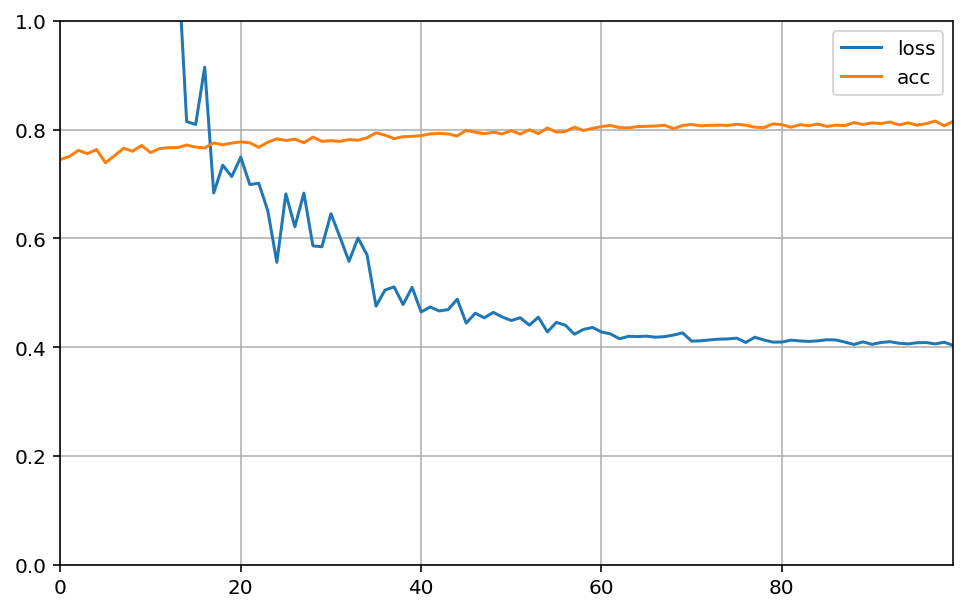

In [19]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Save and load model

In [20]:
#model.save('my_model.h5')

In [21]:
#model = keras.models.load_model("my_model.h5")

## Open up Tensor Board

http://localhost:6006

In [22]:
#import subprocess
#subprocess.Popen("tensorboard --logdir=./my_logs --port=6006")

## Accuracy

In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Text(0.5, 257.44, 'Predicted label')

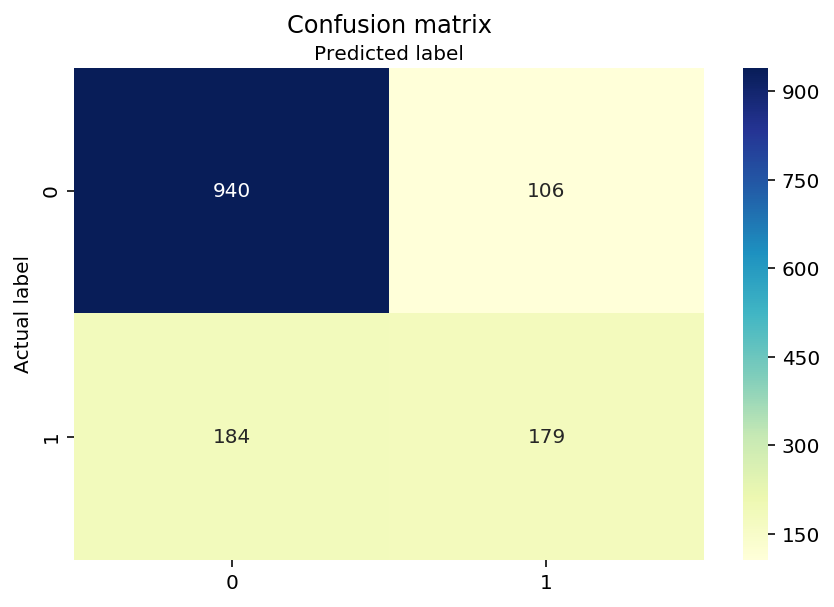

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

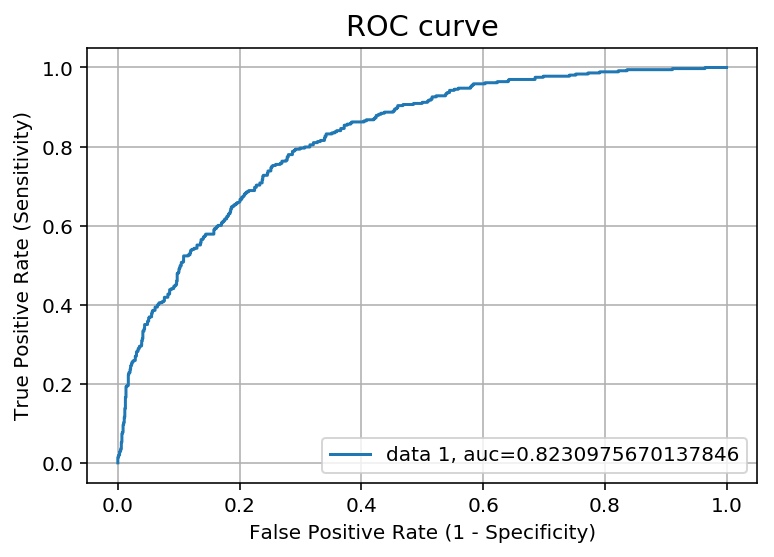

In [25]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(X_test))
auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
# reference: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## Shap

In [26]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [27]:
data = X_train.sample(n=500)
test = X_test.sample(n=100)
data.head(n=3)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2342,30,106.4,3211.90,1,0,1,0,1,0,1,...,1,1,0,0,1,0,1,0,0,0
3813,69,105.0,7297.75,0,1,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
6705,22,51.1,1232.90,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [28]:
explainer = shap.DeepExplainer( model, data )
print('Expected Value:', explainer.expected_value)


Expected Value: [0.293438]


In [29]:
shap_values = explainer.shap_values(test.values)
pd.DataFrame(shap_values[0]).head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.073388,0.017685,-0.039899,0.001438,-0.000987,-0.002217,-0.002623,0.002932,0.000112,0.001615,...,0.004246,-0.014150,0.002901,-0.060352,0.004527,0.001594,0.002999,-0.011843,-0.009366,0.002579
1,-0.089071,-0.001310,-0.027057,0.001639,-0.001206,-0.002558,-0.003019,0.003470,0.000125,-0.000678,...,0.005219,-0.016354,-0.019603,0.010921,0.005812,0.002029,0.003794,0.002991,-0.010657,-0.012792
2,-0.118275,0.045005,-0.017442,-0.003430,0.001274,-0.002302,-0.002547,-0.002959,0.000282,-0.000133,...,0.005887,0.009724,0.004577,0.016479,0.007975,0.003195,0.004049,0.003279,0.016814,0.005663
3,-0.160098,-0.029122,0.027486,-0.001424,0.002307,-0.001760,-0.001952,-0.001685,0.000673,-0.000080,...,-0.002106,-0.014208,-0.022026,0.006162,-0.007730,-0.001835,-0.004296,0.001841,-0.007604,0.003181
4,0.024152,-0.041405,-0.086878,-0.001615,0.002742,-0.002252,-0.002560,-0.002024,0.000914,-0.000182,...,-0.002660,-0.017743,-0.028880,0.007927,-0.010080,-0.002771,0.000908,0.002257,-0.009268,-0.014435


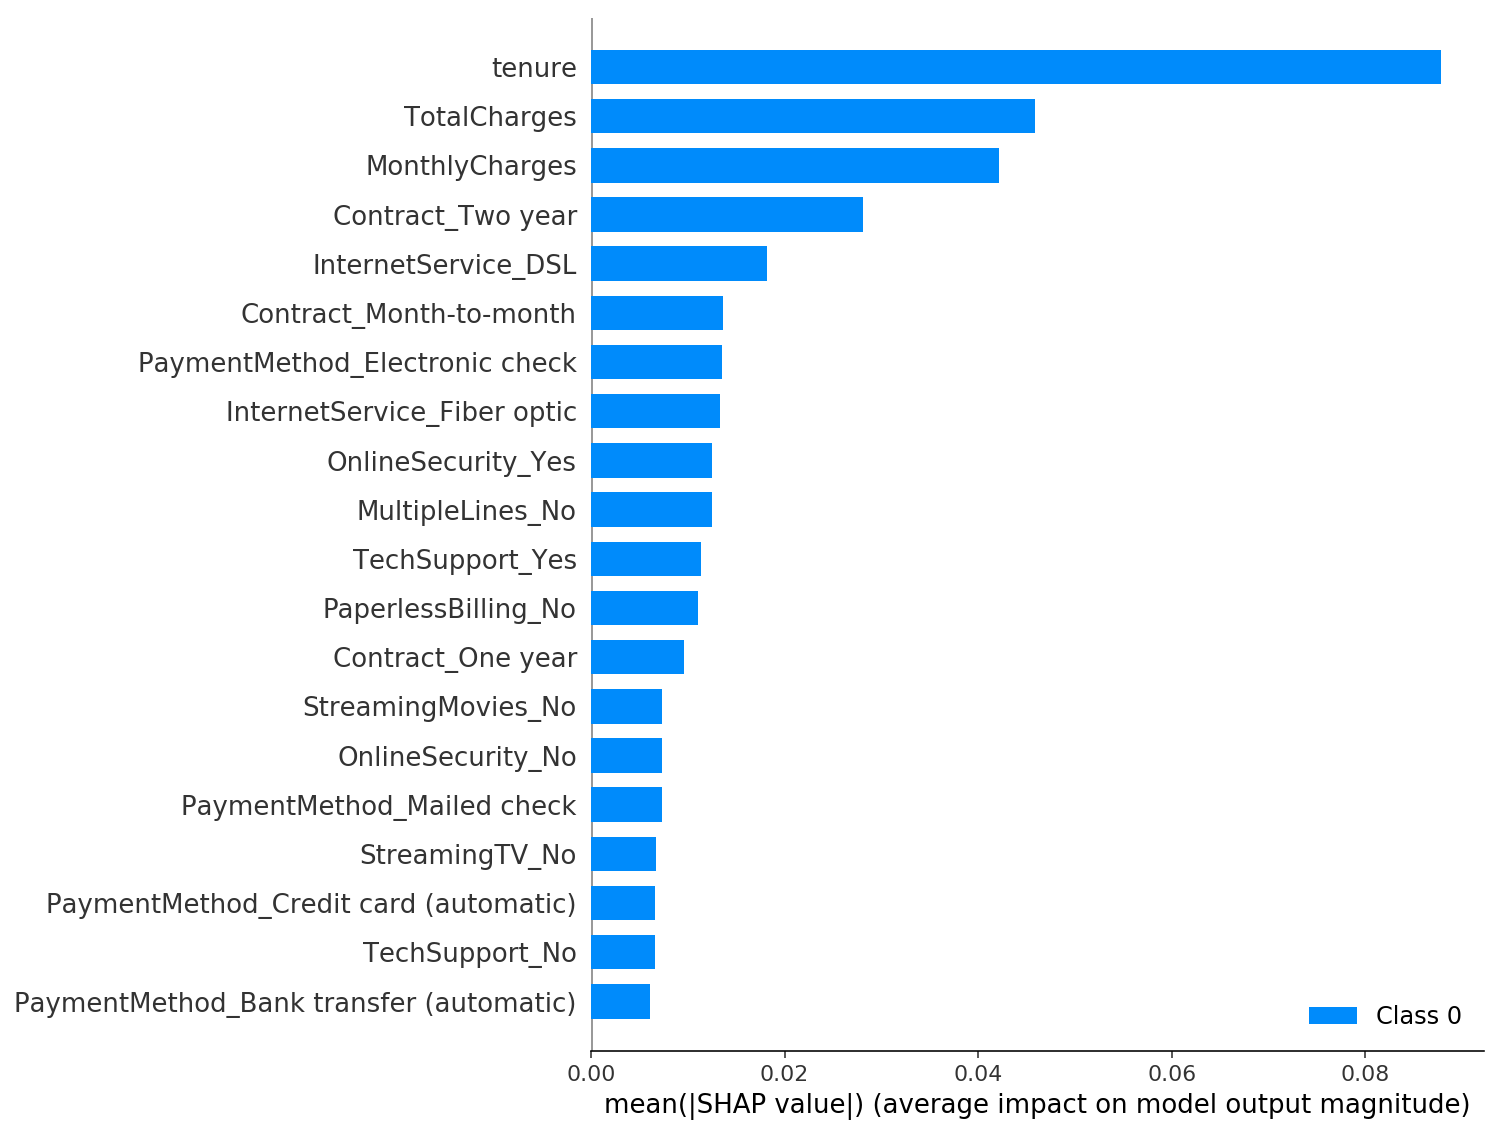

In [30]:
shap.summary_plot(shap_values, data)

In [31]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
i=3
shap.force_plot(explainer.expected_value, shap_values[0][i,:], data.iloc[i])

In [32]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
i=22
shap.force_plot(explainer.expected_value, shap_values[0][i,:], data.iloc[i])

In [33]:
#data

In [34]:
#shap.dependence_plot("TotalCharges", np.array(shap_values), data)

In [35]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[0], data)